# INDENTIFIKASI STUNTING

## IMPORT LIBRARY DAN DATASET

In [584]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

data = pd.read_csv("Stunting1.csv", encoding="latin-1")
print(data)

      Usia Berat  Tinggi                 BBU  ZS BB/U  ZS TB/U  \
0       56    15   105.0  Berat Badan Normal    -1.30    -0.70   
1       48  12.5   102.5  Berat Badan Normal    -1.89    -0.06   
2       54    18   103.0  Berat Badan Normal     0.28    -0.79   
3       54  22.7   110.0        Risiko Lebih     1.93     0.63   
4       38  14.7    96.0  Berat Badan Normal    -0.06    -0.49   
...    ...   ...     ...                 ...      ...      ...   
2135    34  11.6    92.0         Gizi Kurang    -2.20    -2.10   
2136    36  12.9    93.0  Berat Badan Normal    -0.80    -0.01   
2137    35  10.5    90.0        Risiko Lebih    -1.20    -0.01   
2138    45  12.4    92.0           Gizi Baik    -0.60    -0.01   
2139    40  11.7    91.0       Sangat Kurang    -2.50    -2.30   

                   BBTB  ZS BB/TB  Gender           TB/U  
0             Gizi Baik     -1.39       0         Normal  
1           Gizi Kurang     -2.80       0         Normal  
2     Risiko Gizi Lebih      1

In [585]:
data.head(10)

,Usia,Berat,Tinggi,BBU,ZS BB/U,ZS TB/U,BBTB,ZS BB/TB,Gender,TB/U
0,56,15,105.0,Berat Badan Normal,-1.30,-0.70,Gizi Baik,-1.39,0,Normal
1,48,12.5,102.5,Berat Badan Normal,-1.89,-0.06,Gizi Kurang,-2.80,0,Normal
2,54,18,103.0,Berat Badan Normal,0.28,-0.79,Risiko Gizi Lebih,1.17,1,Normal
3,54,22.7,110.0,Risiko Lebih,1.93,0.63,Gizi Lebih,2.23,1,Normal
4,38,14.7,96.0,Berat Badan Normal,-0.06,-0.49,Gizi Baik,0.34,0,Normal
5,57,14.3,102.0,Berat Badan Normal,-1.57,-1.34,Gizi Baik,-1.12,1,Normal
6,48,16.4,104.0,Berat Badan Normal,0.08,0.19,Gizi Baik,-0.03,1,Normal
7,49,13,95.0,Berat Badan Normal,-1.66,-1.91,Gizi Baik,-0.75,0,Normal
8,51,15.8,100.0,Berat Badan Normal,-0.89,-1.83,Gizi Baik,0.41,0,Normal
9,58,17,103.0,Berat Badan Normal,-0.35,-1.16,Gizi Baik,0.57,0,Normal


In [586]:
data.drop(['ZS BB/U', 'ZS TB/U', 'ZS BB/TB' ], axis=1, inplace=True)
data.head(10)

,Usia,Berat,Tinggi,BBU,BBTB,Gender,TB/U
0,56,15,105.0,Berat Badan Normal,Gizi Baik,0,Normal
1,48,12.5,102.5,Berat Badan Normal,Gizi Kurang,0,Normal
2,54,18,103.0,Berat Badan Normal,Risiko Gizi Lebih,1,Normal
3,54,22.7,110.0,Risiko Lebih,Gizi Lebih,1,Normal
4,38,14.7,96.0,Berat Badan Normal,Gizi Baik,0,Normal
5,57,14.3,102.0,Berat Badan Normal,Gizi Baik,1,Normal
6,48,16.4,104.0,Berat Badan Normal,Gizi Baik,1,Normal
7,49,13,95.0,Berat Badan Normal,Gizi Baik,0,Normal
8,51,15.8,100.0,Berat Badan Normal,Gizi Baik,0,Normal
9,58,17,103.0,Berat Badan Normal,Gizi Baik,0,Normal


## VISUALISASI

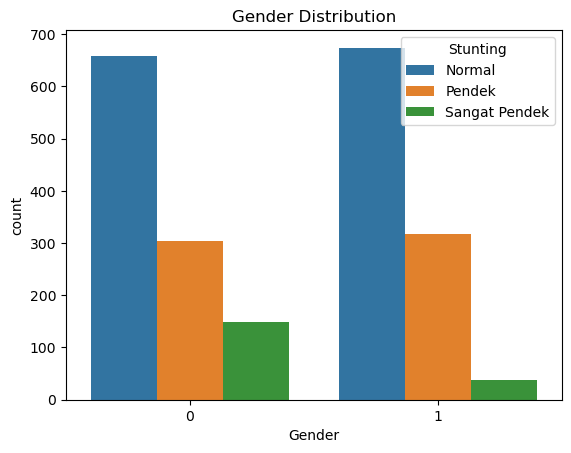

In [587]:
sns.countplot(data=data, x='Gender', hue='TB/U')
plt.legend(title='Stunting', labels=['Normal', 'Pendek', 'Sangat Pendek'])
plt.title('Gender Distribution')
plt.show()

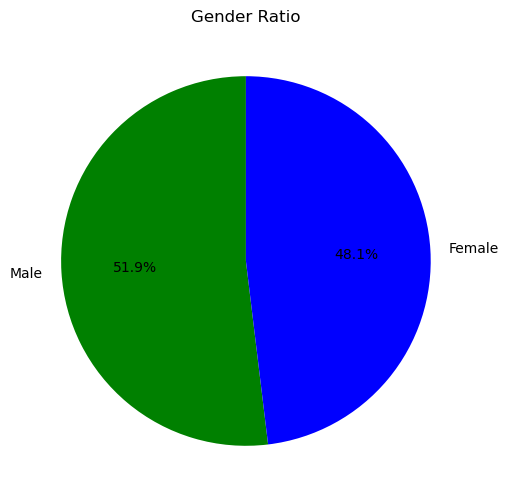

In [588]:
sex_counts = data['Gender'].value_counts()
labels = ['Male', 'Female']
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'blue'])
plt.title('Gender Ratio')
plt.show()

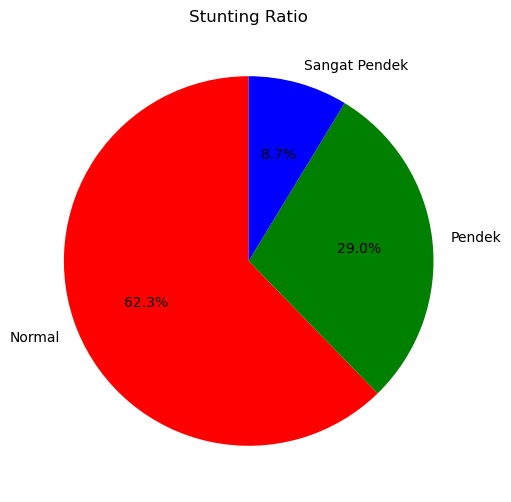

In [589]:
survived = data['TB/U'].value_counts()
labels = ['Normal', 'Pendek', 'Sangat Pendek']
plt.figure(figsize=(8, 6))
plt.pie(survived, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Stunting Ratio')
plt.show()

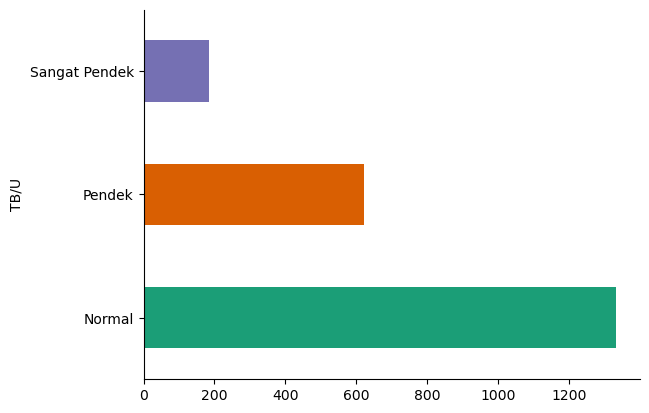

In [590]:
# @title TB/U

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('TB/U').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

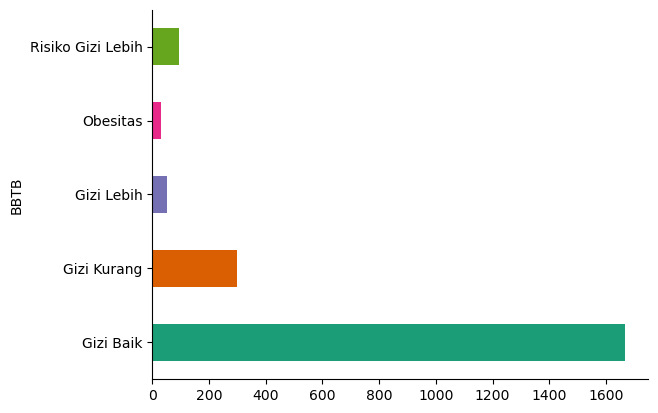

In [591]:
# @title BB/TB

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('BBTB').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

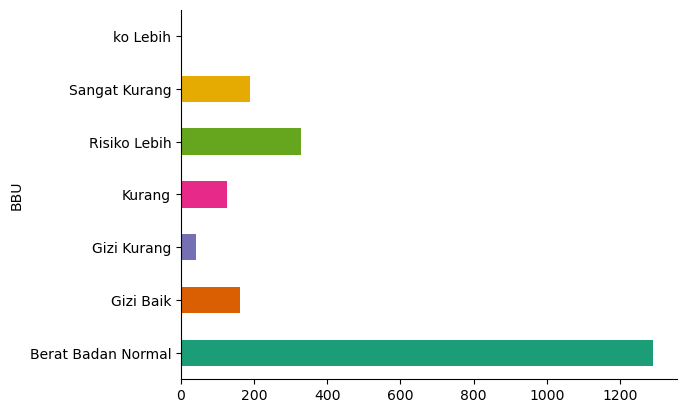

In [592]:
# @title BB/U

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('BBU').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### CEK DATA VALUE

In [593]:
data['BBU'] = data['BBU'].replace(['Gizi Baik', 'Gizi Kurang', 'ko Lebih'], ['Berat Badan Normal', 'Kurang', 'Risiko Lebih'])

In [594]:
print(data['BBU'].unique())
print(data['BBTB'].unique())
print(data['TB/U'].unique())
print(data['Gender'].unique())

['Berat Badan Normal' 'Risiko Lebih' 'Kurang' 'Sangat Kurang']
['Gizi Baik' 'Gizi Kurang' 'Risiko Gizi Lebih' 'Gizi Lebih' 'Obesitas']
['Normal' 'Pendek' 'Sangat Pendek']
[0 1]


In [595]:
data['BBTB'].value_counts()

Gizi Baik            1665
Gizi Kurang           298
Risiko Gizi Lebih      94
Gizi Lebih             52
Obesitas               31
Name: BBTB, dtype: int64

In [596]:
data['BBU'].value_counts()

Berat Badan Normal    1452
Risiko Lebih           329
Sangat Kurang          190
Kurang                 169
Name: BBU, dtype: int64

In [597]:
data['TB/U'].value_counts()

Normal           1333
Pendek            621
Sangat Pendek     186
Name: TB/U, dtype: int64

In [598]:
data['Gender'].unique()

array([0, 1], dtype=int64)

In [599]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Usia    2140 non-null   int64  
 1   Berat   2140 non-null   object 
 2   Tinggi  2140 non-null   float64
 3   BBU     2140 non-null   object 
 4   BBTB    2140 non-null   object 
 5   Gender  2140 non-null   int64  
 6   TB/U    2140 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 117.2+ KB


In [600]:
data.describe()

,Usia,Tinggi,Gender
count,2140.000000,2140.000000,2140.000000
mean,46.495327,96.947196,0.480841
std,8.232280,6.474415,0.499750
min,23.000000,77.500000,0.000000
25%,39.000000,91.000000,0.000000
50%,48.000000,96.000000,0.000000
75%,54.000000,102.000000,1.000000
max,59.000000,118.700000,1.000000


## MODELING DATA

In [601]:
from sklearn.preprocessing import LabelEncoder
labelencoder_BBU = LabelEncoder()
data['BBU'] = labelencoder_BBU.fit_transform(data['BBU'])

labelencoder_BBTB = LabelEncoder()
data['BBTB'] = labelencoder_BBTB.fit_transform(data['BBTB'])


In [602]:
columns_with_comma_numbers = ['Berat', 'Tinggi', 'BBU', 'BBTB']

for column in columns_with_comma_numbers:
  if data[column].dtype == 'object':
    data[column] = data[column].str.replace(',', '.').astype(float)

In [603]:
X = data.drop (columns='TB/U', axis=1)
y = data['TB/U']

In [604]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y) 

In [605]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [607]:
naiveB = GaussianNB()

In [608]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
accuracy_list = []

for train_index, val_index in kf.split(X_scaled):
    X_train_kf, X_val_kf = X_scaled[train_index], X_scaled[val_index]
    y_train_kf, y_val_kf = y[train_index], y[val_index]  # Changed y.iloc[] to y[]

    naiveB.fit(X_train_kf, y_train_kf)
    y_val_pred = naiveB.predict(X_val_kf)
    accuracy = accuracy_score(y_val_kf, y_val_pred)
    accuracy_list.append(accuracy)

print("K-Fold Cross Validation Accuracy:", np.mean(accuracy_list) * 100)

K-Fold Cross Validation Accuracy: 83.3644859813084


In [609]:
naiveB.fit(X_train, y_train)

GaussianNB()

In [610]:
y_pred_naiveB = naiveB.predict(X_test)
accuracy_naiveB = accuracy_score(y_test, y_pred_naiveB) * 100
print("Accuracy score Naive Bayes:", accuracy_naiveB)
print("Classification Report Naive Bayes:")
print(classification_report(y_test, y_pred_naiveB))

Accuracy score Naive Bayes: 84.11214953271028
Classification Report Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       274
           1       0.65      0.87      0.74       111
           2       0.93      0.91      0.92        43

    accuracy                           0.84       428
   macro avg       0.84      0.87      0.85       428
weighted avg       0.87      0.84      0.85       428



In [611]:
y1_pred_naiveB = naiveB.predict(X_train)
accuracy_naiveB_train = accuracy_score(y_train, y1_pred_naiveB) * 100
print("Accuracy score Naive Bayes (Training Set):", accuracy_naiveB_train)
print("Classification Report Naive Bayes (Training Set):")
print(classification_report(y_train, y1_pred_naiveB))

Accuracy score Naive Bayes (Training Set): 83.70327102803739
Classification Report Naive Bayes (Training Set):
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1059
           1       0.68      0.88      0.76       510
           2       0.92      0.92      0.92       143

    accuracy                           0.84      1712
   macro avg       0.84      0.87      0.85      1712
weighted avg       0.86      0.84      0.84      1712



## EVALUASI

### DATA YANG DIGUNAKAN UNTUK INPUTAN

In [612]:
data.head(800)

,Usia,Berat,Tinggi,BBU,BBTB,Gender,TB/U
0,56,15.0,105.0,0,0,0,Normal
1,48,12.5,102.5,0,1,0,Normal
2,54,18.0,103.0,0,4,1,Normal
3,54,22.7,110.0,2,2,1,Normal
4,38,14.7,96.0,0,0,0,Normal
...,...,...,...,...,...,...,...
795,45,14.7,98.0,0,0,1,Normal
796,45,19.2,99.2,2,2,1,Normal
797,38,12.0,93.0,0,0,1,Normal
798,39,12.9,92.0,0,0,1,Normal


In [613]:
data.to_csv('NewStunting.csv', index=False)

### INPUT DATA Usia(Bulan)', 'Gender', 'Berat', 'Tinggi', 'ZS BB/U', 'ZS TB/U', 'ZS BB/TB', 'BB/U', 'BB/TB'

In [614]:
input_data = (56, 15.0, 105.0, 0, 0, 0)  # Ensure input format matches the model's expected input
input_data_as_numpy_array = np.array(input_data).reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_as_numpy_array)

# Make prediction
prediction = naiveB.predict(std_data)

# Decode prediction to original label
predicted_label = labelencoder_y.inverse_transform(prediction)  # Decode the predicted label
print(predicted_label)

# Interpret the prediction
if (predicted_label[0] == 'Normal'): 
    print('Tidak terkena stunting')
elif (predicted_label[0] == 'Pendek'): 
    print('Terkena stunting (Pendek)')
else:
    print('Terkena stunting (Sangat Pendek)')


['Normal']
Tidak terkena stunting


l:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [615]:
input_data = (55, 12.4,	96.0, 1, 0,	0)
input_data_as_numpy_array = np.array(input_data).reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_as_numpy_array)

# Make prediction
prediction = naiveB.predict(std_data)

# Decode prediction to original label
predicted_label = labelencoder_y.inverse_transform(prediction)  # Decode the predicted label
print(predicted_label)

# Interpret the prediction
if (predicted_label[0] == 'Normal'): 
    print('Tidak terkena stunting')
elif (predicted_label[0] == 'Pendek'): 
    print('Terkena stunting (Pendek)')
else:
    print('Terkena stunting (Sangat Pendek)')


['Pendek']
Terkena stunting (Pendek)


l:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [616]:
input_data = (31, 10.5,	88.0, 3, 1, 0)
input_data_as_numpy_array = np.array(input_data).reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_as_numpy_array)

# Make prediction
prediction = naiveB.predict(std_data)

# Decode prediction to original label
predicted_label = labelencoder_y.inverse_transform(prediction)  # Decode the predicted label
print(predicted_label)

# Interpret the prediction
if (predicted_label[0] == 'Normal'): 
    print('Tidak terkena stunting')
elif (predicted_label[0] == 'Pendek'): 
    print('Terkena stunting (Pendek)')
else:
    print('Terkena stunting (Sangat Pendek)')

['Sangat Pendek']
Terkena stunting (Sangat Pendek)


l:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [617]:
import pickle

In [618]:
filename = 'deployment.sav'
pickle.dump(naiveB, open(filename, 'wb'))
# Also save the scaler and encoders for future use
pickle.dump(scaler, open('scaler.sav', 'wb'))
pickle.dump(labelencoder_BBU, open('labelencoder_BBU.sav', 'wb'))
pickle.dump(labelencoder_BBTB, open('labelencoder_BBTB.sav', 'wb'))